In [1]:
#Importación de las librerías a utilizar
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
#Subida del archivo
data = pd.read_csv("./artistas.csv")

In [3]:
#Ver cuantas columnas y registros hay en el archivo
data.shape

(635, 11)

In [5]:
#Ver los primeros registros para tener una mejor idea del contenido
data.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


In [6]:
#Ver cuantos alcanzaron el número uno y cuantos no
data.groupby('top').size()


top
0    494
1    141
dtype: int64

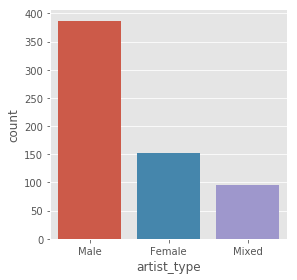

In [7]:
#Ver cuantos registros hay de tipo artista, "mod", tempo y género
#de las canciones.
sb.factorplot('artist_type',data=data,kind="count")

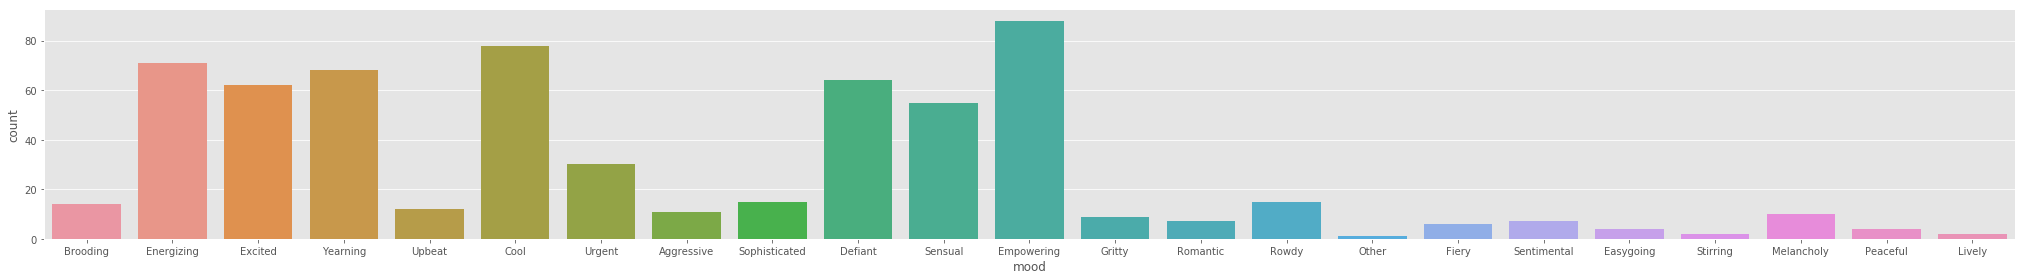

In [8]:
#Vemos que de 23 tipos de Mood, destacan 7 con picos altos.
#Además notamos que algunos estados de ánimo son similares.
sb.factorplot('mood', data=data, kind="count", aspect=7)

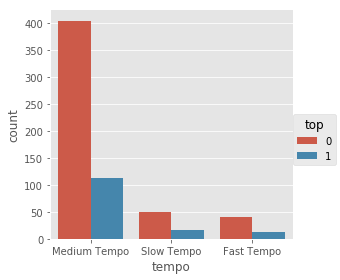

In [9]:
#Vemos que hay 3 tipos de Tempo: Medium, Slow y Fast. 
#Predominan los tiempos Medium y también es donde encontramos más
#canciones que hayan alcanzado el Top 1 (en azul)
sb.factorplot('tempo',data=data, hue='top', kind="count")

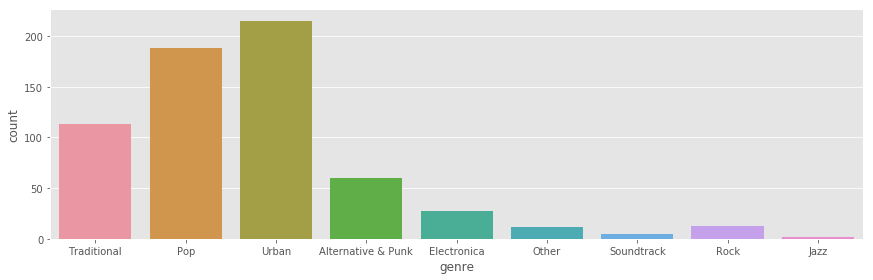

In [10]:
#Entre los géneros musicales destacan Urban y Pop, seguidos del Tradicional
sb.factorplot('genre', data=data, kind="count", aspect=3)

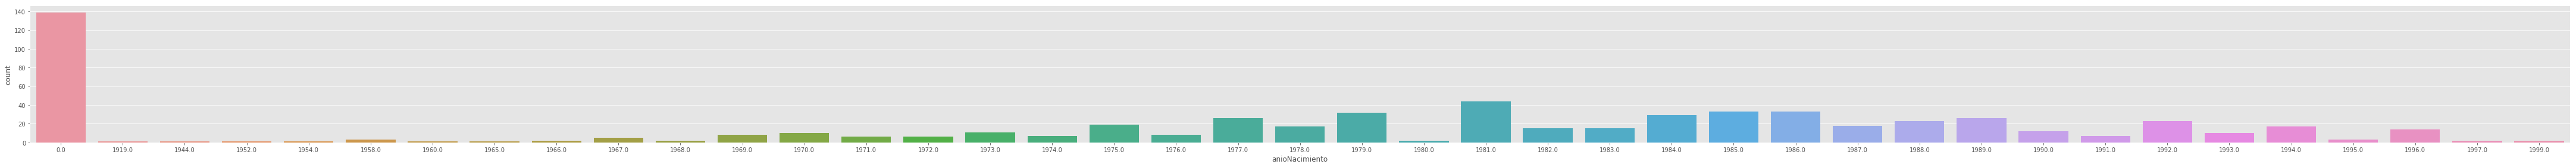

In [11]:
#Visualizar los años de nacimiento de los artistas
#Notamos que existe algo raro y que cerca de 140 artistas nacieron
#en el año cero.
sb.factorplot('anioNacimiento', data=data, kind="count", aspect=15)

In [15]:
#Visualización de los top y no top de acuerdo a sus fechas de los Charts
#f1 = data['chart_date'].values
#f2 = data['durationSeg'].values

#asignar = []
#asignar2 = []
#for index, row in data.iterrows():
#    asignar.append(colores[row['top']])
#    asignar2.append(tamanios[row['top']])
    
#plt.scatter(f1, f2, c=colores, s=tamanios)
#plt.axis([20030101,20160101,0,600])
#plt.show()

#Preparación de los datos. Sabiendo el año de nacimiento del cantante,
#calcular que edad tenía el artista al momento de aparecer en el Billboard
#Sustituir los celor de las columnas "anioNacimiento" por el valor None

def edad_fix(anio):
    if anio == 0:
        return None
    return anio

data['anioNacimiento'] = data.apply(lambda x: edad_fix(x['anioNacimiento']), axis = 1);
    



In [16]:
#Calcular la edad en una nueva columna restando el ano de aparición
# los primeros 4 caracteres de chart_date al ano de nacimiento
def calcula_edad(anio,cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio == 0.0:
        return None
    return int(momento) - anio

data['anioNacimiento'] = data.apply(lambda x: calcula_edad(x['anioNacimiento'], x['chart_date']), axis = 1);

In [18]:
#Asignación de edades aleatorias a los registros faltantes: para
#ello, obtenemos el promedio de edad de nuestro conjunto avg y
#su desvío estándar std y pedimos valores random a la función
#que van desde avg-std hasta avg+std. En este caso son edades
#entre 21 a 37 años.

age_avg = data['edad_en_billboard'].mean()
age_std = data['edad_en_billboard'].std()
age_null_count = data['edad_en_billboard'].insnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_aveg + age_std, size=age_null_count)

conValoresNulos = np.isnan(data['edad_en_billboard'])

data.loc[np.isnan(data['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list
data['edad_en_billboard'] = data['edad_en_billboard'].astype(int)
print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + "a" + str(int(age_avg + age_std)))

KeyError: 'edad_en_billboard'